In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
marketing = pd.read_csv("marketing_numerical.csv")
(marketing.columns.values)

array(['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language',
       'Unnamed: 13'], dtype=object)

In [7]:
mushroom

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,p
1,0,0,1,1,1,0,0,1,0,0,...,0,0,1,0,2,0,1,1,1,e
2,1,0,2,1,2,0,0,1,1,0,...,0,0,1,0,2,0,1,1,2,e
3,0,1,2,1,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,p
4,0,0,3,0,3,0,1,1,0,1,...,0,0,1,0,2,1,1,2,1,e
5,0,1,1,1,1,0,0,1,1,0,...,0,0,1,0,2,0,0,1,1,e
6,1,0,2,1,1,0,0,1,9,0,...,0,0,1,0,2,0,0,1,2,e
7,1,1,2,1,2,0,0,1,1,0,...,0,0,1,0,2,0,1,0,2,e
8,0,1,2,1,0,0,0,0,10,0,...,0,0,1,0,2,0,0,3,1,p
9,1,0,1,1,1,0,0,1,9,0,...,0,0,1,0,2,0,0,0,2,e


In [8]:
i = 100
j = 0
features = ['Cap-shape', ' Cap-surface', ' Cap-color', ' Bruises', ' Odor',
       ' Gill-attachment', ' Gill-spacing', ' Gill-size', ' Gill-color',
       ' Stalk-shape', ' Stalk-root', ' Stalk-surface-above-ring',
       ' Stalk-surface-below-ring', ' Stalk-color-above-ring',
       ' Stalk-color-below-ring', ' Veil-type', ' Veil-color',
       ' Ring-number', ' Ring-type', ' Spore-print-color', ' Population',
       ' Habitat']
for index, m in mushroom.iterrows():
    if index % 20 == 0:
        mushroom.at[index+2,features[j]] = i + 1
        j += 3
        i += 10
        if j >= 22:
            j = 0

In [9]:
i = 0
j = 0
for index, m in mushroom.iterrows():
    if index % 20 == 0:
        if index < 5637:
            mushroom.at[index+5,:] = mushroom.loc[j,:]
        else:
            mushroom.at[index+1,:] = mushroom.loc[j,:]
        j += 120
        if j >= 5637:
            j = 0

In [10]:
mushroom.to_csv('/home/valia/Documents/AppliedDataScience/mushroomNoise.csv', sep=',')

In [11]:
data = mushroom.iloc[:,0:22]
labels = mushroom.iloc[:,22]
labels.unique()


array(['p', 'e'], dtype=object)

In [12]:
kf = KFold(n_splits=2, shuffle=True) #5 times with 2 folds

### Euclidean and k tuning on 10% noise datasets

In [13]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1755
           e       0.99      0.99      0.99      1067

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1749
           e       0.99      0.99      0.99      1073

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9911410347271439
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1742
           e       0.99      0.99      0.99      1080

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg  

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model2 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model2

              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1693
           e       0.99      0.98      0.98      1129

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9875974486180015
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1811
           e       0.99      0.99      0.99      1011

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1765
           e       0.99      0.99      0.99      1057

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg  

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model3 = sum(acc)/10 
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model3

              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1733
           e       1.00      0.96      0.98      1089

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9815733522324592
              precision    recall  f1-score   support

           p       0.98      0.99      0.99      1771
           e       0.99      0.97      0.98      1051

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9858256555634302
              precision    recall  f1-score   support

           p       0.98      0.99      0.99      1724
           e       0.99      0.98      0.98      1098

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg  

In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model4 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model4

              precision    recall  f1-score   support

           p       0.97      0.99      0.98      1762
           e       0.99      0.95      0.97      1060

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9776754075124026
              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1742
           e       1.00      0.95      0.97      1080

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9794472005669738
              precision    recall  f1-score   support

           p       0.97      0.99      0.98      1757
           e       0.99      0.95      0.97      1065

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg  

In [17]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model5 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model5

              precision    recall  f1-score   support

           p       0.97      1.00      0.98      1780
           e       1.00      0.94      0.97      1042

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9780297661233168
              precision    recall  f1-score   support

           p       0.95      0.99      0.97      1724
           e       0.99      0.92      0.95      1098

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.96      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9659815733522324
              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1765
           e       0.99      0.93      0.96      1057

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.96      0.97      2822
weighted avg  

In [18]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model6 = sum(acc)/10
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model6

              precision    recall  f1-score   support

           p       0.96      0.99      0.98      1770
           e       0.98      0.94      0.96      1052

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9709425939050319
              precision    recall  f1-score   support

           p       0.95      0.99      0.97      1734
           e       0.99      0.92      0.95      1088

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.97      0.96      0.96      2822
weighted avg       0.97      0.96      0.96      2822

accuracy:  0.9649184975194898
              precision    recall  f1-score   support

           p       0.96      0.99      0.98      1748
           e       0.98      0.94      0.96      1074

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.97      2822
weighted avg  

In [19]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model7 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model7

              precision    recall  f1-score   support

           p       0.93      0.99      0.96      1739
           e       0.99      0.88      0.93      1083

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9510985116938342
              precision    recall  f1-score   support

           p       0.93      0.99      0.96      1765
           e       0.99      0.88      0.93      1057

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9507441530829199
              precision    recall  f1-score   support

           p       0.93      0.99      0.96      1742
           e       0.99      0.87      0.93      1080

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.93      0.94      2822
weighted avg  

In [20]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model8 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model8

              precision    recall  f1-score   support

           p       0.88      0.99      0.93      1776
           e       0.98      0.76      0.86      1046

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.93      0.88      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.904677533664068
              precision    recall  f1-score   support

           p       0.88      1.00      0.94      1728
           e       0.99      0.80      0.88      1094

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.94      0.90      0.91      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.9177888022678952
              precision    recall  f1-score   support

           p       0.89      0.99      0.94      1743
           e       0.98      0.80      0.88      1079

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.94      0.89      0.91      2822
weighted avg   

In [21]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model9 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model9

              precision    recall  f1-score   support

           p       0.84      0.99      0.91      1748
           e       0.99      0.69      0.81      1074

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.84      0.86      2822
weighted avg       0.90      0.88      0.87      2822

accuracy:  0.8784549964564139
              precision    recall  f1-score   support

           p       0.85      0.99      0.91      1756
           e       0.97      0.71      0.82      1066

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.90      0.88      0.88      2822

accuracy:  0.8827072997873848
              precision    recall  f1-score   support

           p       0.85      0.99      0.92      1753
           e       0.99      0.71      0.83      1069

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.85      0.87      2822
weighted avg  

[0.9897944720056697, 0.9893338058114812, 0.9835931963146705, 0.9773919206236712, 0.9725726435152373, 0.9681077250177179, 0.9526222537207655, 0.9115520907158043, 0.880297661233168]


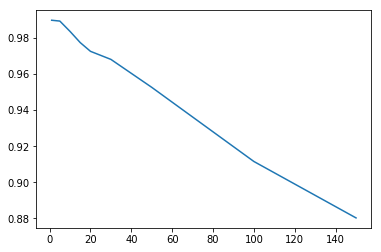

In [22]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 10% noise dataset

In [23]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1732
           e       0.99      0.99      0.99      1090

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1772
           e       0.99      0.99      0.99      1050

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9904323175053154
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1762
           e       0.98      0.99      0.99      1060

   micro avg       0.99      0.99      0.99      2822
   macro avg       0

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['p', 'e'])
              precision    recall  f1-score   support

           p       1.00      0.99      0.99      1748
           e       0.99      0.99      0.99      1074

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.99      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9936215450035436
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      0.99      0.99      1756
           e       0.99      0.97      0.98      1066

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9854712969525159
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.99      0.99      0.99      1770
           e       0.99      0.98      0.98      1052

   micro avg       0.99      0.99      0.99      2822
   macro avg       0

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model12 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model12

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      1.00      0.99      1728
           e       1.00      0.96      0.98      1094

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.99      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9836995038979447
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      0.99      0.99      1776
           e       0.99      0.97      0.98      1046

   micro avg       0.99      0.99      0.99      2822
   macro avg       0.99      0.98      0.99      2822
weighted avg       0.99      0.99      0.99      2822

accuracy:  0.9861800141743444
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.98      0.99      0.99      1740
           e       0.99      0.97      0.98      1082

   micro avg       0.98      0.98      0.98      2822
   macro avg       0

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1741
           e       0.99      0.94      0.97      1081

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.97      0.97      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9751948972360028
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.97      0.99      0.98      1763
           e       0.99      0.96      0.97      1059

   micro avg       0.98      0.98      0.98      2822
   macro avg       0.98      0.98      0.98      2822
weighted avg       0.98      0.98      0.98      2822

accuracy:  0.9801559177888023
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1751
           e       0.99      0.94      0.96      1071

   micro avg       0.97      0.97      0.97      2822
   macro avg       0

In [27]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model13 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model13

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1721
           e       1.00      0.94      0.97      1101

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.97      0.97      2822
weighted avg       0.98      0.97      0.97      2822

accuracy:  0.9748405386250886
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      1.00      0.98      1783
           e       0.99      0.94      0.96      1039

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.98      0.97      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9737774627923459
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      0.99      0.98      1764
           e       0.99      0.94      0.96      1058

   micro avg       0.97      0.97      0.97      2822
   macro avg       0

In [28]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model14 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model14

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      0.99      0.98      1766
           e       0.98      0.93      0.96      1056

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9691708008504607
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.96      0.99      0.97      1738
           e       0.99      0.93      0.96      1084

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.97      0.96      0.97      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9681077250177179
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.95      0.99      0.97      1735
           e       0.99      0.92      0.95      1087

   micro avg       0.96      0.96      0.96      2822
   macro avg       0

In [29]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model15 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model15

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.94      0.99      0.97      1758
           e       0.99      0.89      0.94      1064

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.94      0.95      2822
weighted avg       0.96      0.96      0.95      2822

accuracy:  0.9553508150248051
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.93      0.99      0.96      1746
           e       0.98      0.88      0.93      1076

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.93      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9475549255846917
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.93      0.99      0.96      1781
           e       0.98      0.87      0.92      1041

   micro avg       0.95      0.95      0.95      2822
   macro avg       0

In [30]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model16 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model16

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.88      0.99      0.93      1801
           e       0.98      0.76      0.86      1021

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.93      0.88      0.90      2822
weighted avg       0.92      0.91      0.91      2822

accuracy:  0.9092841956059532
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.88      0.99      0.93      1703
           e       0.99      0.79      0.88      1119

   micro avg       0.91      0.91      0.91      2822
   macro avg       0.93      0.89      0.91      2822
weighted avg       0.92      0.91      0.91      2822

accuracy:  0.9142452161587526
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.88      0.99      0.93      1755
           e       0.98      0.78      0.87      1067

   micro avg       0.91      0.91      0.91      2822
   macro avg       0

In [31]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model17 = sum(acc)/10
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model17

set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.85      0.99      0.91      1760
           e       0.98      0.71      0.82      1062

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8851878100637846
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.84      0.99      0.91      1744
           e       0.99      0.69      0.81      1078

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.84      0.86      2822
weighted avg       0.89      0.88      0.87      2822

accuracy:  0.8763288447909284
set(['p', 'e'])
              precision    recall  f1-score   support

           p       0.84      0.99      0.91      1751
           e       0.98      0.69      0.81      1071

   micro avg       0.88      0.88      0.88      2822
   macro avg       0

[0.988412473423104, 0.9891211906449326, 0.9826718639262934, 0.9769312544294827, 0.9726789510985115, 0.9680014174344436, 0.9516300496102055, 0.9111268603827071, 0.8813607370659107]


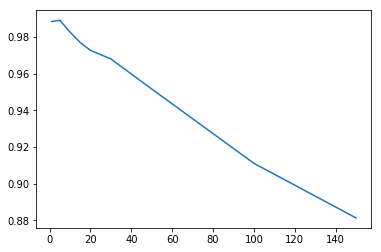

In [41]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

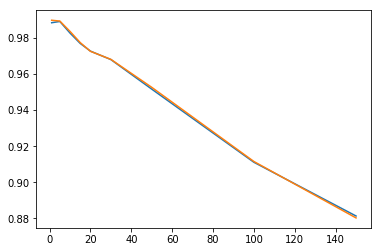

In [42]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()